In [1]:
import os, sys
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST as FST
import graphviz
from IPython.display import display, Markdown

In [2]:
states = [0,2,1]
initState = 0
inAlphabet = [0,1]
outAlphabet = [0,1,2]
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunction = [ [0,0,1], [1,0,1], [1,1,2] ]
# outputFunction Moore [ [State, outAlphabet], ...]
outputFunctionMoore = [ [0,0], [1,0], [2,2]]
# outputFunction Mealy [ [State, inAlphabet, outAlphabet], ...]
outputFunctionMealy = [ [0,1,0], [1,1,0], [2,2,2]]

digraph fst {
	rankdir=LR;
	node [shape=point]; start;
	node [shape=doublecircle]; 0 [label=q0];
	start -> 0;
	node [shape=circle];
	2 [label=q2];
	1 [label=q1];
	node [style=filled, fillcolor=red];
	0 -> 1 [label=0];
	1 -> 1 [label=0];
	1 -> 2 [label=1];
}


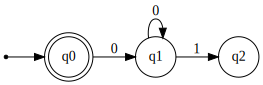

In [3]:
fstMoore = FST(states, initState, inAlphabet, outAlphabet, transitionFunction, outputFunctionMoore)
print(fstMoore.toDot())
graphviz.Source(fstMoore.toDot())

digraph fst {
	rankdir=LR;
	node [shape=point]; start;
	node [shape=doublecircle]; 0 [label=q0];
	start -> 0;
	node [shape=circle];
	2 [label=q2];
	1 [label=q1];
	node [style=filled, fillcolor=red];
	0 -> 1 [label=0];
	1 -> 1 [label=0];
	1 -> 2 [label=1];
}


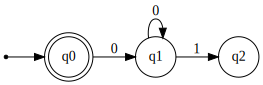

In [4]:
fstMealy = FST(states, initState, inAlphabet, outAlphabet, transitionFunction, outputFunctionMealy)
print(fstMealy.toDot())
graphviz.Source(fstMealy.toDot())

In [5]:
# print(fstMealy.trFuncDict)
# print(fstMealy.toMdTransitionTable())
display(Markdown(fstMealy.toMdTransitionTable()))

| Input \ state | q0 | q2 | q1 |
|:---:|:---:|:---:|:---:|
| __0__ | q1 | ... | q1 |
| __1__ | ... | ... | q2 |
